# Austin COTA S Curve Speeds

After attending the Formula 1 race in Austin at Circuit of the Americas I was interest how the speeds compare for the section of the track where I was watching from.

Install Dependencies...

In [1]:
import fastf1 as ff1
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm

Enable cache so we don't have to download all the time

In [2]:
ff1.Cache.enable_cache('cache') 

Get the data from the Austin Race

In [3]:
session = ff1.get_session(2021, 'Austin')

race = session.get_race()
race = race.load_laps(with_telemetry=True)

core           INFO 	Loading laps for United States Grand Prix - Race [v2.1.13]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Loaded data for 20 drivers: ['5', '14', '16', '22', '99', '10', '47', '7', '44', '31', '4', '9', '11', '3', '33', '55', '18', '77', '6', '63']


Get telemetry data from (super) Max to see where the S curve is

In [4]:
ver = race.pick_driver('VER')
telemetry = ver.get_telemetry()

Plot the coords to get the track outline

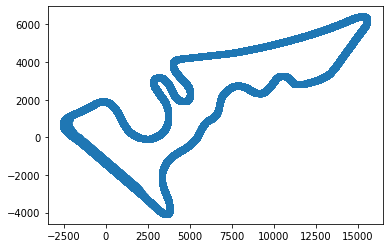

In [5]:
pos_x = telemetry['X']
pos_y = telemetry['Y']

plt.scatter(pos_x, pos_y)

Stab at the coords until it looks right...

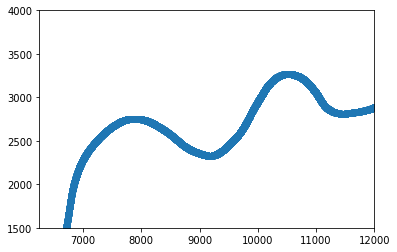

In [6]:
plt.xlim(6250, 12000)
plt.ylim(1500, 4000)
plt.scatter(pos_x, pos_y)

Sure these seem good enough

In [7]:
xmin, xmax = 6250, 12000
ymin, ymax = 1500, 4000

Get driver names to iterate through later

In [8]:
drivers = race['Driver'].unique()

In [9]:
results = []

for driver in tqdm(drivers):
    telemetry = race.pick_driver(driver).get_telemetry()
    valid_idx = [telemetry['X'] > xmin] and [telemetry['X'] < xmax] and [telemetry['Y'] > ymin] and [telemetry['Y'] < ymax]
    valid_data = telemetry.loc[valid_idx[0]]
    
    avg_speed = valid_data['Speed'].mean()
    results.append((driver, avg_speed))

100%|███████████████████████████████████████████| 20/20 [00:17<00:00,  1.14it/s]


Sort by speed and print

In [10]:
sorted(results, key=lambda x: x[1], reverse=True)

[('VER', 184.34750772180212),
 ('HAM', 184.26469883048725),
 ('PER', 182.96449438202248),
 ('LEC', 182.66036889463547),
 ('RIC', 181.42423208191127),
 ('SAI', 181.30760767054386),
 ('BOT', 181.2119662155073),
 ('NOR', 181.08500379949166),
 ('VET', 179.5639774166315),
 ('TSU', 179.43037874176215),
 ('STR', 178.92365749750172),
 ('GIO', 178.83038041332105),
 ('RUS', 178.57941222858946),
 ('ALO', 178.513203316319),
 ('RAI', 177.87396434189827),
 ('LAT', 177.4669122449513),
 ('MSC', 177.06011769071728),
 ('OCO', 174.66690257970913),
 ('MAZ', 174.23379231210558),
 ('GAS', 169.67851837179361)]

Interesting, but this doesn't account for spin outs and runoff which would hurt some drivers. Let's look at fastest lap for a fair(er) comparison.

In [11]:
results = []

for driver in tqdm(drivers):
    telemetry = race.pick_driver(driver).pick_fastest().get_telemetry()
    valid_idx = [telemetry['X'] > xmin] and [telemetry['X'] < xmax] and [telemetry['Y'] > ymin] and [telemetry['Y'] < ymax]
    valid_data = telemetry.loc[valid_idx[0]]
    
    avg_speed = valid_data['Speed'].mean()
    results.append((driver, avg_speed))

100%|███████████████████████████████████████████| 20/20 [00:08<00:00,  2.47it/s]


In [12]:
sorted(results, key=lambda x: x[1], reverse=True)

[('HAM', 191.45552147239263),
 ('VER', 190.27105666156203),
 ('LEC', 189.79420731707316),
 ('PER', 189.44224924012158),
 ('ALO', 188.0332326283988),
 ('VET', 187.2867867867868),
 ('NOR', 187.25714285714287),
 ('BOT', 186.77560240963857),
 ('GIO', 186.3688155922039),
 ('RIC', 186.32631578947368),
 ('STR', 186.29790419161677),
 ('RUS', 185.9550898203593),
 ('TSU', 185.62537313432836),
 ('SAI', 185.24328358208956),
 ('MSC', 185.2225519287834),
 ('LAT', 184.74035608308606),
 ('GAS', 184.49925925925925),
 ('RAI', 184.49703264094956),
 ('OCO', 183.82448377581122),
 ('MAZ', 181.75620437956204)]

In [13]:
sorted(results, key=lambda x: x[1], reverse=True)

[('HAM', 191.45552147239263),
 ('VER', 190.27105666156203),
 ('LEC', 189.79420731707316),
 ('PER', 189.44224924012158),
 ('ALO', 188.0332326283988),
 ('VET', 187.2867867867868),
 ('NOR', 187.25714285714287),
 ('BOT', 186.77560240963857),
 ('GIO', 186.3688155922039),
 ('RIC', 186.32631578947368),
 ('STR', 186.29790419161677),
 ('RUS', 185.9550898203593),
 ('TSU', 185.62537313432836),
 ('SAI', 185.24328358208956),
 ('MSC', 185.2225519287834),
 ('LAT', 184.74035608308606),
 ('GAS', 184.49925925925925),
 ('RAI', 184.49703264094956),
 ('OCO', 183.82448377581122),
 ('MAZ', 181.75620437956204)]

Hamilton was about 6 kilometers/hour faster than Mick , who was still 4 kilometers/hour faster than his teammate Mazepin.

A more fair comparison would exclude any points in a lap when a drive went off track. It would also ignore any laps that occured under a safety car. Should get around to that at somepoint.. //TODO
